In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

在绘图之前先准备数据，数据形式必须是np.array()形式的数组数据，利用上面导入的matplotlib模块进行绘图； 

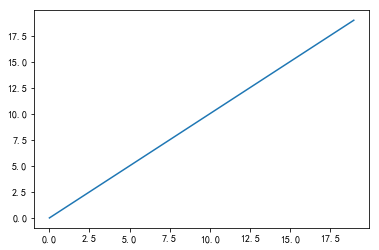

In [3]:
np.arange(20) 

plt.plot(np.arange(20)) 

plt.show()
# 最后生成一个由点连接的y=x的线性图 

生成由5个点组成的两个点之间用线连接的折线：

- 如果想利用pandas绘图，可得到Series或DataFrame对象，并利用series.plot()或dataframe.plot()进行绘图。
- 而对于DataFrame绘图，则其每个column都为一个绘图图线，会将每个column作为一个图线都绘制到一张图片当中，并用不同的线条颜色及不同的图例标签进行表示； 
例如：

## Series.plot()

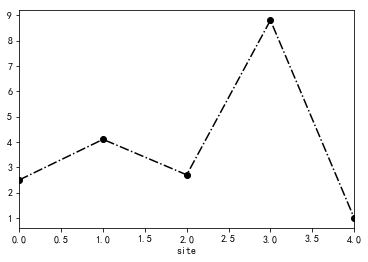

In [11]:
series=pd.Series([2.5, 4.1, 2.7, 8.8, 1.0]) 
series.index.name='site'

series.plot(kind="line",linestyle='-.', color='k', marker='o') ;

通过series.plot()中的kind参数，能画以下图：
    - 'line' : 线图（默认）
    - 'bar' : 垂直条形图
    - 'barh' : 水平条形图
    - 'hist' : 直方图
    - 'box' : 箱型图
    - 'kde' : 核密度估计图
    - 'density' :与'kde'相同
    - 'area' : 面积图
    - 'pie' :饼图

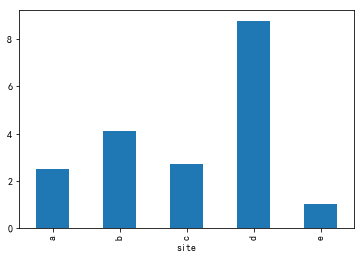

In [12]:
series=pd.Series([2.5, 4.1, 2.7, 8.8, 1.0]) 

series.index=["a","b","c","d","e"]
series.index.name='site'

series.plot(kind="bar") ;

```
    
   
   
    
   
   
```

## dataframe.plot()


通过dataframe.plot()中的kind参数，可以绘制以下图  :
- 'line' ：线图（默认）
- ‘bar’ or ‘barh’ ：条状图 
- ‘hist’ ：频率柱状图（计算某些值出现的频率） 
- ‘box’ ：箱线图（） 
- ‘kde’ or ‘density’ ：密度图（需要scipy这个包） 
- ‘area’ ：区域图（不同域的面积占比） 
- ‘scatter’ ：散点图 >>> plt.scatter(df['part A'], df['part B']) 
- ‘hexbin’ ： plt.hexbin(df['part A'], df['part B'], df['part C']) 
- ‘pie’ ：饼图，比较适合与Series对象，看不同的占比 


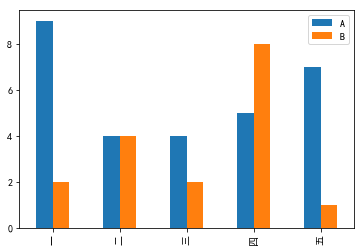

In [18]:
dataframe=pd.DataFrame({'A':[9, 4, 4, 5, 7], 'B':[2, 4, 2, 8, 1]}) 

dataframe.index=["一","二","三","四","五"]
dataframe.plot(kind="bar");

# dataframe.plot(subplots=True, sharex=True);

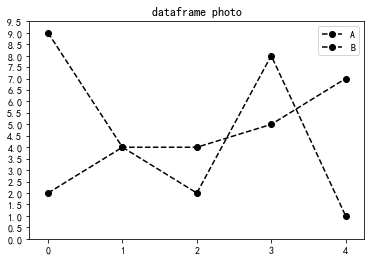

In [19]:
dataframe=pd.DataFrame({'A':[9, 4, 4, 5, 7], 'B':[2, 4, 2, 8, 1]}) 

dataframe.plot(linestyle='--', 
               color='k', marker='o', 
               xticks=[0, 1, 2, 3, 4], yticks=list(np.arange(0, 10.0, 0.5)) ,xlim=[-0.25, 4.25],
              title='dataframe photo');

### dataframe.plot.bar()

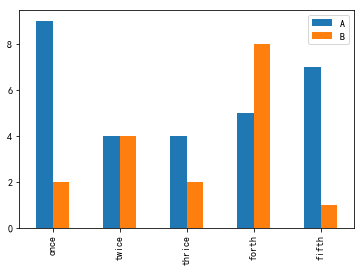

In [58]:
dataframe=pd.DataFrame({'A':[9, 4, 4, 5, 7], 'B':[2, 4, 2, 8, 1]}) 
dataframe.index=['once', 'twice', 'thrice', 'forth', 'fifth'] 

dataframe.plot.bar(); 

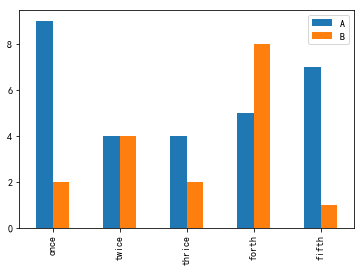

In [11]:
dataframe=pd.DataFrame({'A':[9, 4, 4, 5, 7], 'B':[2, 4, 2, 8, 1]}) 
dataframe.index=['once', 'twice', 'thrice', 'forth', 'fifth'] 

dataframe.plot(kind="bar");

# dataframe.plot(subplots=True, sharex=True);

### dataframe.plot.hist()

直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。

dataframe.plot.hist(bins=20) 
- bins=20表示数值分辨率，具体来说是将随机数设定一个范围。
- 例如5.6，5.7，6.5，如果数值分辨率越低，则会将三个数分到5-7之间。
- 如果数值分辨率越高，5.6，5.7将会分到5-6之间，而6.5将会分到6-7之间。


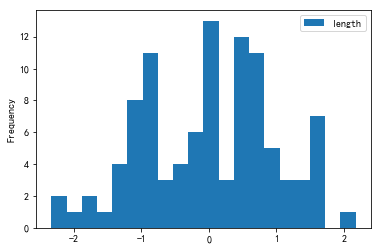

In [21]:
import numpy as np
a=np.random.randn(100)

df=pd.DataFrame({'length':a }) 
df.plot.hist(bins=20);

X轴是DataFrame当中的数值分布，Y轴是对应数值出现的次数； 

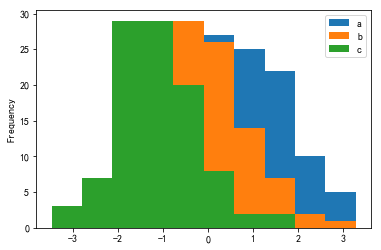

In [14]:
# plt.figure()  #表示设定绘制图标对象 

df= pd.DataFrame({'a': np.random.randn(100) + 1,
                 'b': np.random.randn(100), 
                 'c': np.random.randn(100) - 1},
                index=range(1,101), columns=['a', 'b', 'c'])

df.plot.hist();

如果我要用直方图只查看上面的DataFrame中的其中一个Series（比如a）的数据分布，"抽"这列出来即可：

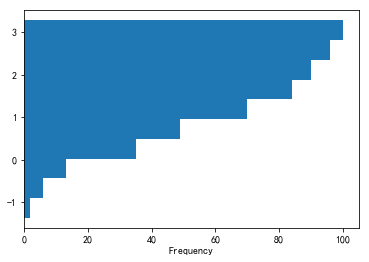

In [15]:
df['a'].plot.hist(orientation='horizontal', cumulative=True);
##该图是将DataFrame对象当中的a进行数值累加，并绘制横向直方图，横轴表示频率（Frequency），纵轴表示数值
#cumulative=True的效果是将Frequency的数值从大到小进行排列。 

df.diff().hist()的效果是将DataFrame当中column分开，即将a，b和c分开绘制成三张图。df4.diff().hist()可达到这个效果，即将所有column分开。

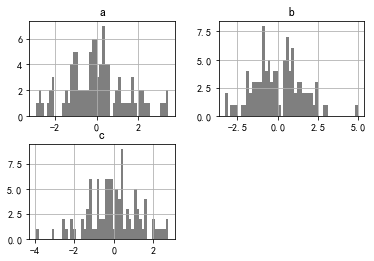

In [16]:
df.diff().hist(color='k', alpha=0.5, bins=50) ;

```
    
   
   
   
```
## 箱线图

- 箱线图所表示的各个数值的含义：线条右下到上分别表示。
- 最小值、第一四分位数、中位数、第三四分位数和最大值 
    - 第一四分位数（Q1），又称“较小四分位数”或“下四分位数”，等于该样本中所有数值由小到大排列后第25%的数字； 
    - 第二四分位数（Q2），又称“中位数”，等于该样本中所有数值由小到大排列后第50%的数字； 
    - 第三四分位数（Q3），又称“较大四分位数”或“上四分位数”，等于该样本中所有数值由小到大排列后第75%的数字； 
    - 第三四分位数与第一四分位数的差距又称四分位间距（InterQuartile Range，IQR）。 
- 计算四分位数首先要确定Q1、Q2、Q3的位置（n表示数字的总个数）： 
    - Q1的位置=（n+1）/4 
    - Q2的位置=（n+1）/2 
    - Q3的位置=3（n+1）/4 

箱线图可以用如下方式绘制:
- Series.plot.box()
- DataFrame.plot.box()
- DataFrame.boxplot() 

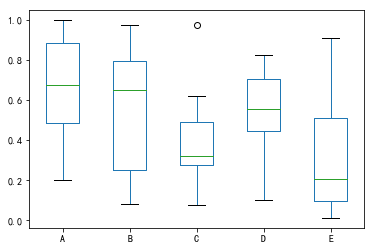

In [30]:
np.random.seed(80)
a=np.random.rand(10, 5)

#np.random.rand产生的随机数都为0-1之间的正数，而np.random.randn产生的随机数中既有正值又有负值
df = pd.DataFrame(a, columns=['A', 'B', 'C', 'D', 'E']) 
df.plot.box();

- 修改箱线图线条颜色需要有一下4个方面：
    - boxes（盒身）
    - whiskers（须）， 
    - medians（中位数）
    - caps（最大值，最小值）
- 可以将颜色与上面的4个keys建立字典关系，并在绘图时引入color。 
- 

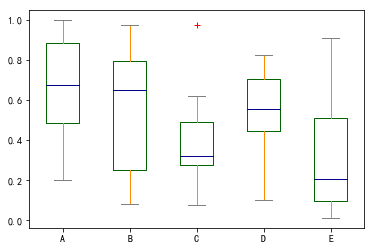

In [31]:
#盒身为深绿色，须为深黄色，中位数为深蓝色，最大最小值为灰色
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

df.plot.box(color=color, sym='r+'); #这里参数 sym是设置极端值的样式

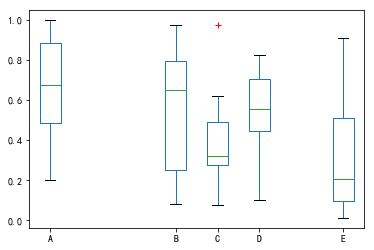

In [33]:
#可绘制水平箱线图，positions表示的意思是ABCDE这5个箱线图摆放位置，A在1位置，B在4位置，AB之间间隔2，3这两个位置。
df.plot.box(vert=True, positions=[1, 4, 5, 6, 8], sym='r+');

```
    
   
   
    
   
   
```
## 区域面积图
（堆积折线图）

绘图方式：
- Series.plot.area()
- DataFrame.plot.area()

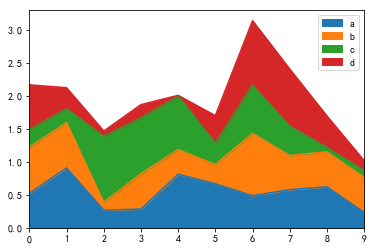

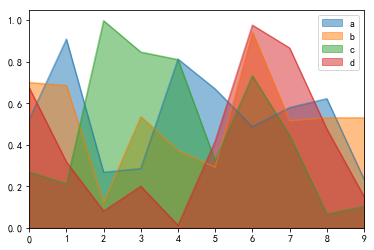

In [23]:
np.random.seed(80)

df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd']) 
df.plot.area() #生成堆积图 
df.plot.area(stacked=False); #非堆积效果图

```
    
   
   
    
   
   
```
## 散点图

绘图方式：DataFrame.plot.scatter() 

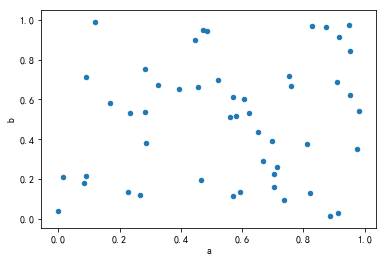

In [6]:
np.random.seed(80)

df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])#abcd四列中，各列设定50个随机数 

df.plot.scatter(x='a', y='b'); #之后以a列为X轴数值，b列为Y轴数值绘制散点图 

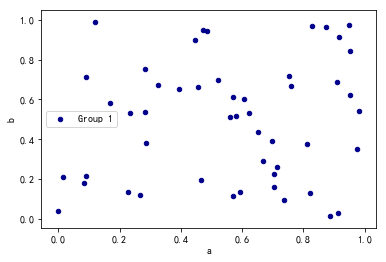

In [7]:
x = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1') #先设定第一个散点图，颜色为深蓝色标签为Group 1，以ab两列作为x及y轴的值 

如果有两组散点图，如何放在同一张图中作对比？

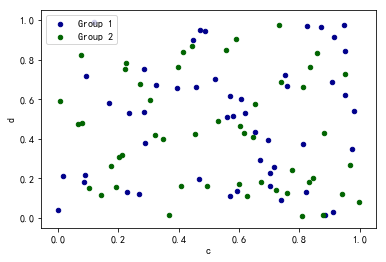

In [8]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1') #先设定第一个散点图，颜色为深蓝色标签为Group 1，以ab两列作为x及y轴的值 
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);
#第二个散点图以cd两列作为x及y轴的值，颜色为深绿色标签为Group 2，ax=ax的作用是将ax这个图绘制到Group 2图片当中，形成两层图形嵌套关系

## 饼图
绘图方式：
- Series.plot.pie() 
- DataFrame.plot.pie()

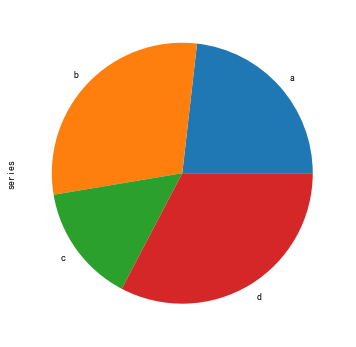

In [120]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6));

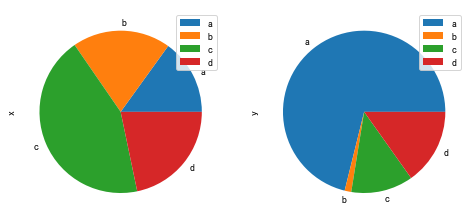

In [30]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y']) 
df.plot.pie(subplots=True, figsize=(8, 4));   #df中两列数据通过subplots=True来设定画两个饼状子图